### Task 1:
Design, implement and test a neural network utilising a single convolutional layer (use as many other non convolutional layers as you need) to classify the MNIST handwritten digits. What is the maximum test accuracry you can achieve using a single convolutional layer?

### Task 2:
Design, implement and test a neural network utitlising multiple convolutional layers (again use as many other non convolutinal laters as you need) to classify the MNIST handwritten digits. What is the maximum test accuracry you can achieve using as many convolutional layers as you like?


- Overall notebook clarity (both in terms of good coding practice and coherent discussion)
- Network performance (how well does your classifier do?)
- Network efficiency (how does your network compare to the optimum networks for this task?)
- Network training (do you do a good job of traning your network?)


# Loading the Dataset

11490434/11490434 [==============================] - 0s 0us/step


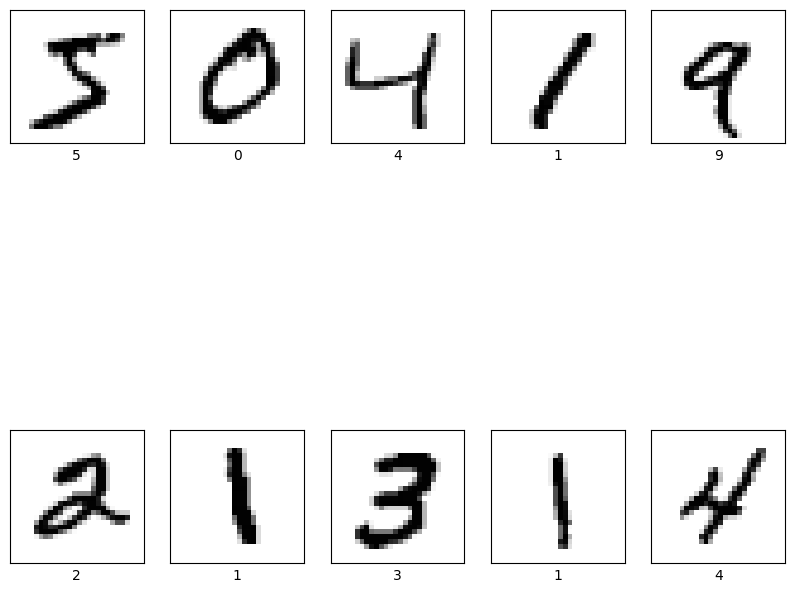

In [ ]:
# TASK 1: design and implement a neural network using TensorFlow and Keras
#use a single convolutional layer in the network

#import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

#Load MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images,test_labels) = mnist.load_data()

# Normalise and reshape data
# Normalise pixel values to be between 0 and 1
train_images_normal, test_images_normal = train_images / 255.0, test_images / 255.0

#rehsape the images to add a channel dimension
train_images_normal = train_images_normal[...,tf.newaxis]
test_images_normal = test_images_normal[...,tf.newaxis]


#check data looks ok

#MNIST class names (numbers between 0 and 9)
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))

#loop through first 10 images
for i in range(10):
    plt.subplot(2,5,i+1) # 2 rows, 5 columns
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_normal[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Defining and Training the Model


In [ ]:
## single convolutional layer neural network, around 6 mins runtime (15 epochs)
#build neural network
model = models.Sequential([
    layers.Conv2D(30, (4,4), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((4, 4)),
    keras.layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(10, activation='relu'),
    layers.Dense(10, activation= 'softmax') #output classification layer
])

#model summary
model.summary()

#train and compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images_normal, train_labels, epochs=15,
                    validation_data=(test_images_normal, test_labels),batch_size = 256)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 25, 25, 30)        510       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 30)          0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 6, 6, 30)          0         
                                                                 
 flatten_9 (Flatten)         (None, 1080)              0         
                                                                 
 dense_18 (Dense)            (None, 10)                10810     
                                                                 
 dense_19 (Dense)            (None, 10)                110       
                                                      

# Evaluating the Model

313/313 - 2s - loss: 0.0583 - accuracy: 0.9820 - 2s/epoch - 8ms/step
So our model achieved an accuracy of 97.53999710083008% on the training dataset, but only 98.19999933242798% on the validation data set.


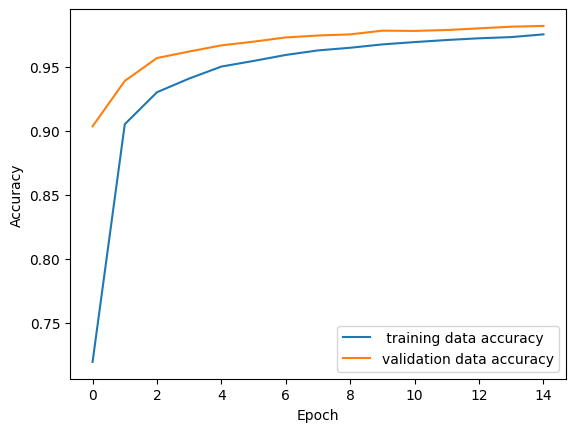

In [ ]:
#### 1 convolutional layer plot cell

##plot the training and validation data accuracy (one convolutional layers)
plt.plot(history.history['accuracy'], label=' training data accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation data accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images_normal,  test_labels, verbose=2)

print( f'So our model achieved an accuracy of {history.history["accuracy"][-1] * 100}% on the training dataset, but only {history.history["val_accuracy"][-1]*100}% on the validation data set.')




In [ ]:
# TASK 2: design and implement a neural network using TensorFlow and Keras, 10 mins 30 seconds runtime (15 epochs)
#use many convolutional layers in the network

#copy data
copy_train_images_normal = train_images_normal.copy()
copy_test_images_normal = test_images_normal.copy()

#build neural network
model1 = models.Sequential([
    layers.Conv2D(32, (4, 4), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(32, (4, 4), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(10, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output classification layer
])

#model summary
model1.summary()

#train and compile model
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history1 = model1.fit(copy_train_images_normal, train_labels, epochs=15,
                    validation_data=(copy_test_images_normal, test_labels), batch_size = 256)


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 12, 12, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 9, 9, 32)          16416     
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 4, 4, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_20 (Flatten)        (None, 512)               0         
                                                                 
 dense_40 (Dense)            (None, 10)              

313/313 - 2s - loss: 0.0353 - accuracy: 0.9886 - 2s/epoch - 7ms/step
So our model achieved an accuracy of 99.16333556175232% on the training dataset, but only 98.86000156402588% on the validation data set.


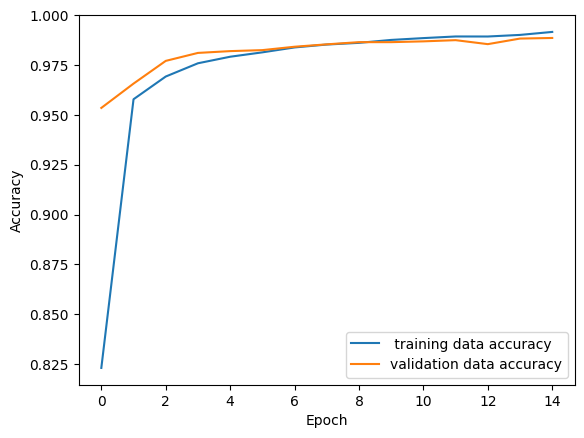

In [ ]:
#### many convolutional layers plot cell

#plot the training and validation data accuracy (one convolutional layers)
plt.plot(history1.history['accuracy'], label=' training data accuracy')
plt.plot(history1.history['val_accuracy'], label = 'validation data accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


# Evaluate the model on the test dataset
test_loss, test_acc = model1.evaluate(copy_test_images_normal,  test_labels, verbose=2)
print( f'So our model achieved an accuracy of {history1.history["accuracy"][-1] * 100}% on the training dataset, but only {history1.history["val_accuracy"][-1]*100}% on the validation data set.')


### Conclusion

In summary, our exploration of single and multiple convolutional layers has provided valuable insights into the performance of our models. The single convolutional layer exhibited commendable accuracy, achieving 97.54% on the training dataset and 98.19% on the validation set. Notably, there is a convergence of accuracy between the testing and training datasets as values increase.

On the other hand, the model with multiple convolutional layers showcased superior performance, achieving an impressive accuracy of 99.16% on the training dataset. This heightened accuracy suggests that the multiple convolutional layers can effectively capture intricate patterns and hierarchical representations within the data. However, the validation accuracy slightly lagged behind at 98.86%, indicating a potential overfitting to the training data. This divergence in accuracies suggests the need for further optimization and regularization techniques to enhance the model's generalization capabilities.

Digging deeper into the training dynamics, the single convolutional layer model demonstrated a more stable convergence of training and validation accuracies, implying a balanced learning process. In contrast, the model with multiple convolutional layers displayed a sharper rise in training accuracy, indicative of its ability to capture intricate features within the training data. However, the validation accuracy plateaued, revealing challenges in generalizing these complex features to unseen data.

In conclusion, these findings underscore the importance of striking a balance between model complexity and generalization. Further refinement and experimentation with hyperparameters, regularization techniques, and perhaps exploring different architectures can lead to a more robust and well-generalizing convolutional neural network. Understanding the nuances in the training dynamics of single and multiple convolutional layers provide valuable insights for tailoring models to specific tasks and datasets.



In [ ]:
### chatgpt use

#to change these lines:
  #preprocess data, normalise pixel values to be in the range [0, 1] by dividing by 255.
train_images_normal = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images_normal = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
  #to this
  #reshape the images to add a channel dimension
train_images_normal = train_images_normal[...,tf.newaxis]
test_images_normal = test_images_normal[...,tf.newaxis]



